## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
# from boruta import BorutaPy
from scipy.stats import norm
#import regressors-
#from regressors import stats
import openpyxl 
import scipy
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
#import eli5
from sklearn.preprocessing import MinMaxScaler
import random
import statsmodels.api as sm 
from sklearn.svm import SVC  
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import VarianceThreshold
import joblib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns 

## Importing DataSet

In [3]:
df = pd.read_csv('C:/Users/G675602/OneDrive - General Mills/Desktop/Aman/Extra/BankChurners.csv')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Cleaning & Visulizations 

In [5]:
#cheking for null
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
# Review dataset's basic overview of numeric attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
# Review dataset's basic overview of categorical attributes
df.describe(include = "O").transpose()

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [8]:
# Basic checks if data has been cleaned prior - Education Level
df["Education_Level"].value_counts() # 1519 unknowns

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [9]:
# Basic checks if data has been cleaned prior - Marital_Status
df["Marital_Status"].value_counts() # 749 unknown

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [10]:
# Basic checks if data has been cleaned prior - Income_Category
df["Income_Category"].value_counts() # 1112 unknown

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [11]:
# Basic checks if data has been cleaned prior - Gender Category
df["Gender"].value_counts() # 0 unknown

F    5358
M    4769
Name: Gender, dtype: int64

In [12]:
# Basic checks if data has been cleaned prior - Card_Category
df["Card_Category"].value_counts() # All known - 20 Platinum, might not be useful

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [13]:
#first we need to check how many unique flag are there in attrition flag
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [14]:
#Assigning churn flag for customors for classification 
df["Churn"] = np.where(df["Attrition_Flag"] == "Attrited Customer", 1, 0)

In [15]:
#drop also the customer number
df.drop(columns =["CLIENTNUM"] , inplace = True)

In [16]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn'],
      dtype='object')

In [17]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Churn                         int32
dtype: object

In [18]:
## Creating a Histogram for all columns:
# Plotting continous features 
features  =  []
features = df.select_dtypes(['float64']).columns.to_list()

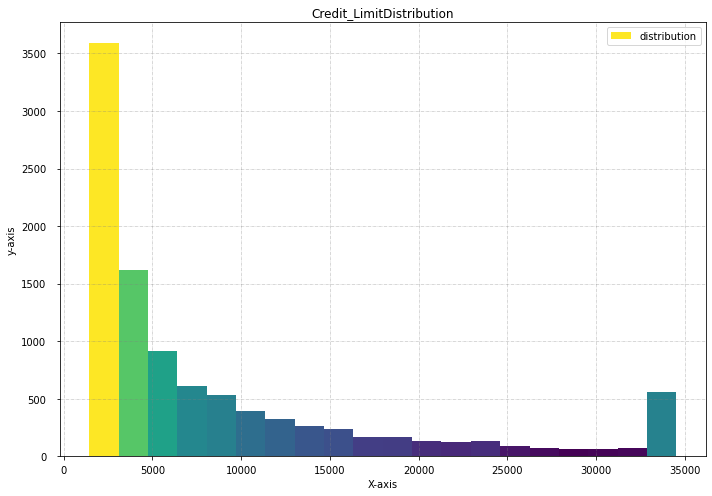

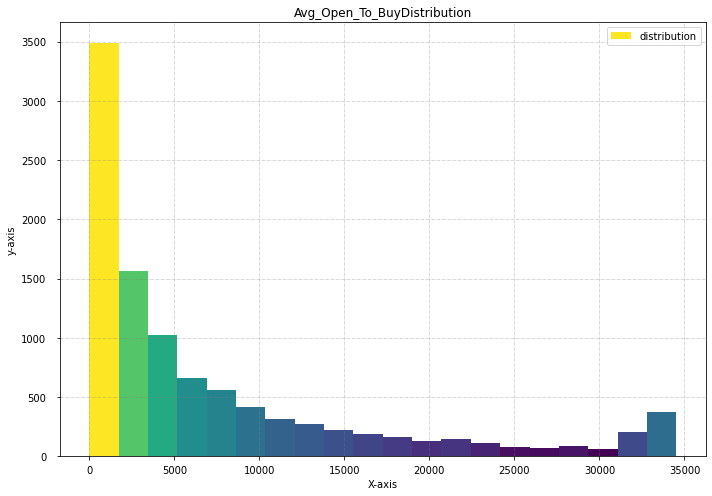

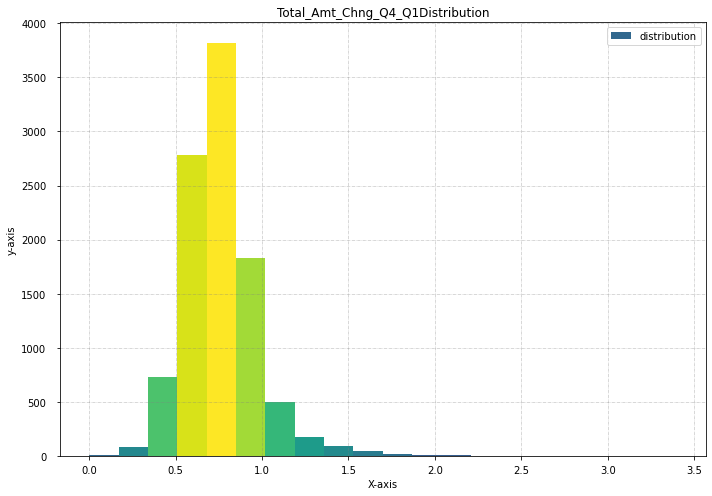

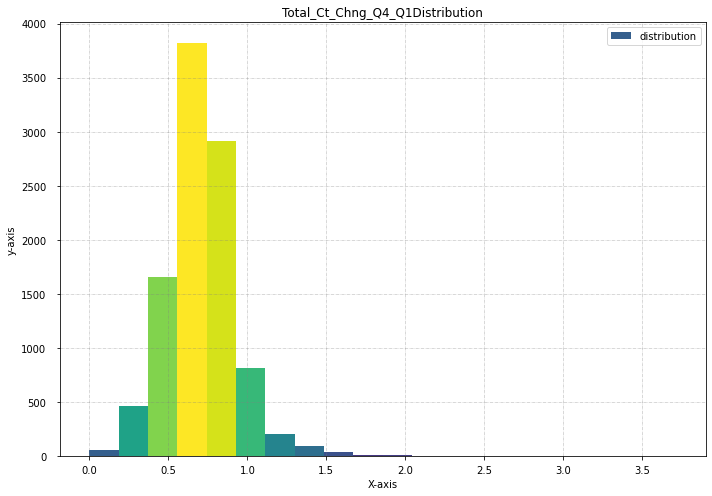

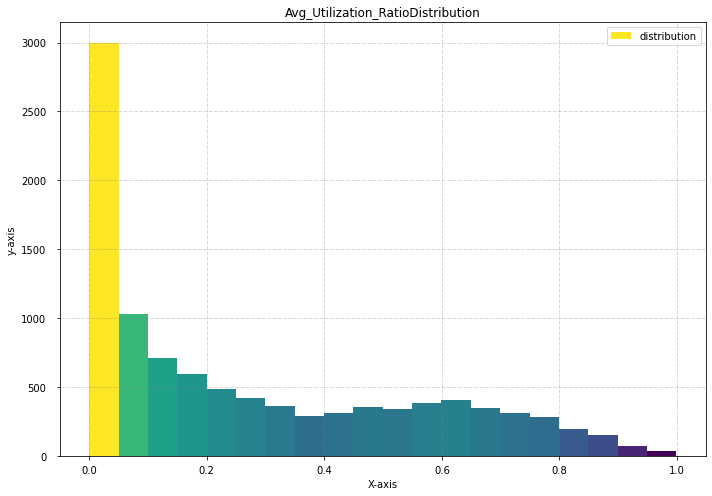

In [19]:

np.random.seed(23685752)
N_points = 10000
n_bins = 20
legend = ['distribution']

for cont_feature in features: 
        # Creating histogram
        fig, axs = plt.subplots(1, 1,
                                figsize =(10, 7),
                                tight_layout = True)




        # Add padding between axes and labels
        axs.xaxis.set_tick_params(pad = 5)
        axs.yaxis.set_tick_params(pad = 10)

        # Add x, y gridlines
        axs.grid(b = True, color ='grey',
                linestyle ='-.', linewidth = 0.5,
                alpha = 0.6)

        # Creating histogram
        N, bins, patches = axs.hist(df[cont_feature], bins = n_bins)

        # Setting color
        fracs = ((N**(1 / 5)) / N.max())
        norm = colors.Normalize(fracs.min(), fracs.max())

        for thisfrac, thispatch in zip(fracs, patches):
            color = plt.cm.viridis(norm(thisfrac))
            thispatch.set_facecolor(color)

        # Adding extra features   
        plt.xlabel("X-axis")
        plt.ylabel("y-axis")
        plt.legend(legend)
        plt.title(cont_feature + "Distribution")

        # Show plot
        plt.show()

Text(0.5, 1.0, 'Customer Age Distributation')

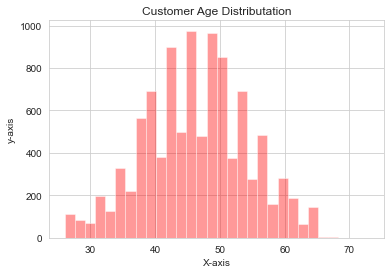

In [20]:
# set the background style of the plot
# customers' distribution by Age
sns.set_style('whitegrid')
sns.distplot(df['Customer_Age'], kde = False, color ='red', bins = 30)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title("Customer Age Distributation")

In [21]:
colors = ['#006E7F','#F8CB2E','#EE5007', '#37E2D5', '#14C38E','#B22727']

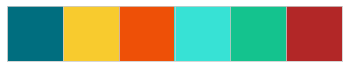

In [22]:
sns.palplot(sns.color_palette(colors))

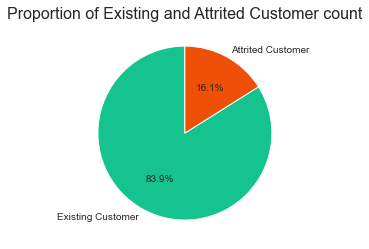

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [23]:
# Customers' Proportion based on attrition status (Y variable proportion)

plt.pie(df['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], colors=[colors[4],colors[2]], autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()
df["Attrition_Flag"].value_counts()


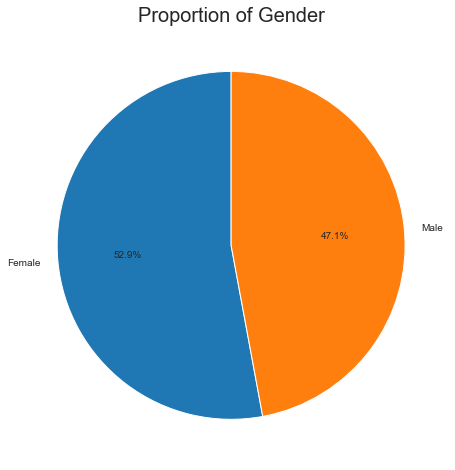

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

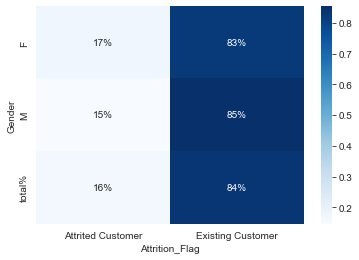

In [24]:
# Customers' Distribution  based on Gender
plt.figure(figsize = (8,8))
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Gender', fontsize =20)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each gender category
cross = pd.crosstab(df['Gender'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

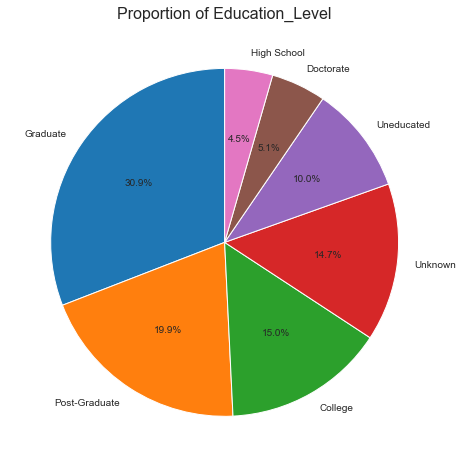

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Education_Level'>

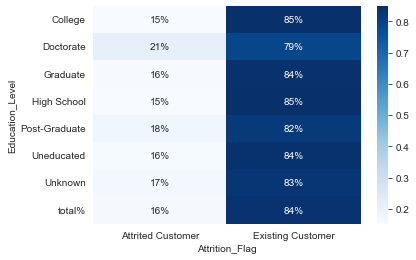

In [25]:
# Customers' Distribution  based on Education Level
plt.figure(figsize = (8,8))
plt.pie(df['Education_Level'].value_counts(),
        labels = ['Graduate', 'Post-Graduate', 'College', 'Unknown', 'Uneducated','Doctorate', 'High School'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Education_Level', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Education_Level'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

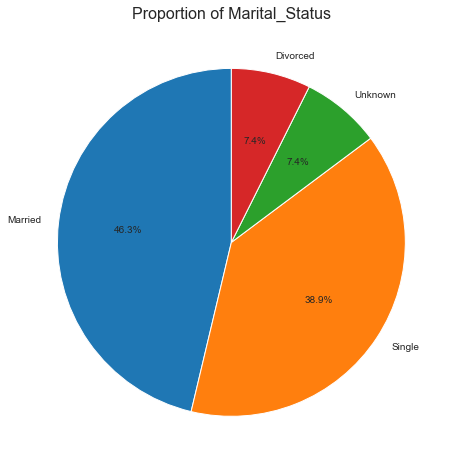

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Marital_Status'>

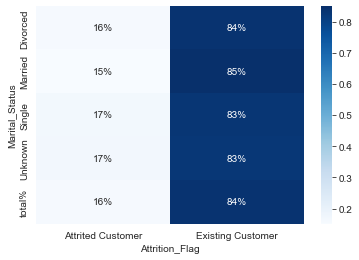

In [26]:
# Customers' Distribution  based on Education Level
plt.figure(figsize = (8,8))
plt.pie(df['Marital_Status'].value_counts(),
        labels = ['Married', 'Single', 'Unknown', 'Divorced'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Marital_Status', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Marital_Status'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

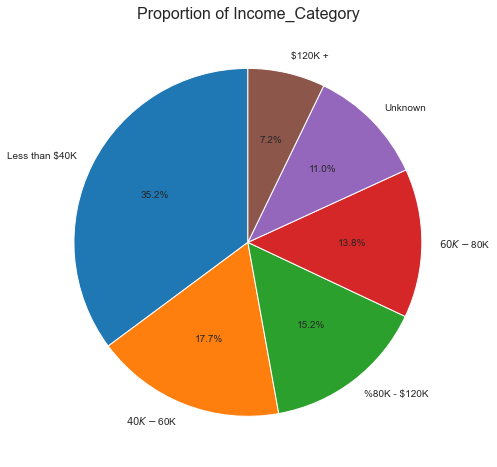

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Income_Category'>

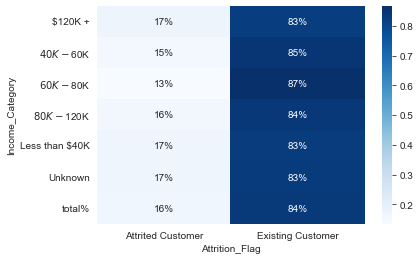

In [27]:
# Customers' Distribution  based on Education Level
plt.figure(figsize = (8,8))
plt.pie(df['Income_Category'].value_counts(),
        labels = ['Less than $40K', '$40K - $60K', '%80K - $120K', '$60K - $80K', 'Unknown','$120K +'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Income_Category', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Income_Category'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

<AxesSubplot:xlabel='Credit_Limit', ylabel='Total_Trans_Amt'>

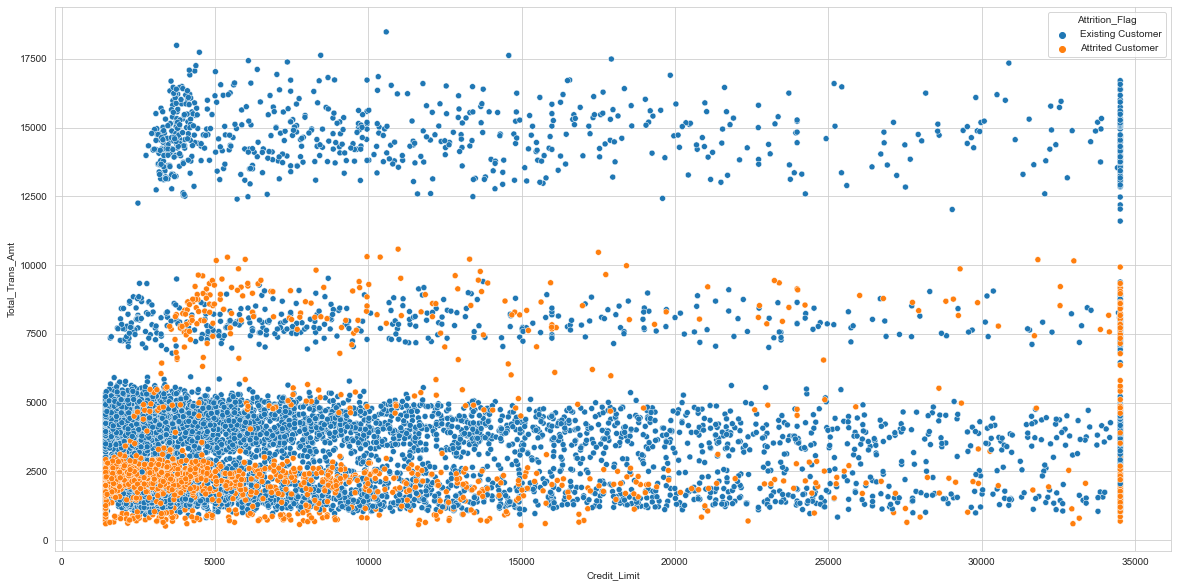

In [28]:
# total transaction of clients from existing and attrited group based on their credit limit

plt.figure(figsize=[20,10])
sns.scatterplot( x = 'Credit_Limit', y = 'Total_Trans_Amt', data = df, hue = 'Attrition_Flag' ) 

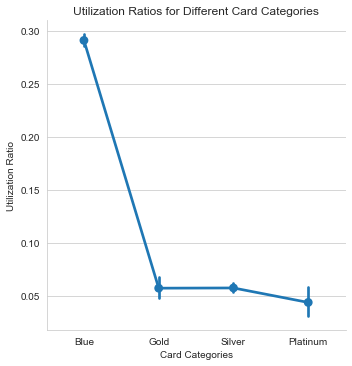

In [29]:
# card type vs utilization

sns.catplot(data=df, x='Card_Category', y='Avg_Utilization_Ratio' , kind='point')
plt.xlabel('Card Categories')
plt.ylabel('Utilization Ratio')
plt.title('Utilization Ratios for Different Card Categories');

In [30]:
def dist_plot_kde(df, ax, label, feature ,xlabel= None,  title= None):
    """
    Python function to plot the distribution of a feature for positive or negative label values
    df: dataframe
    ax: plot definition 
    label: label
    feature: feature
    title: title of the plot
    xlabel:  x axis label
    
    """
    #positive label
    ax = sns.kdeplot(df[feature].loc[(df[label] == 1)],
                     color="Red", shade = True)
    #negative label
    ax = sns.kdeplot(df[feature].loc[(df[label] == 0)],
                     ax =ax, color="Blue", shade= True, alpha= 0.2)
    
    #legend and other plot labels
    ax.legend([label,"Not " + label ],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    return 

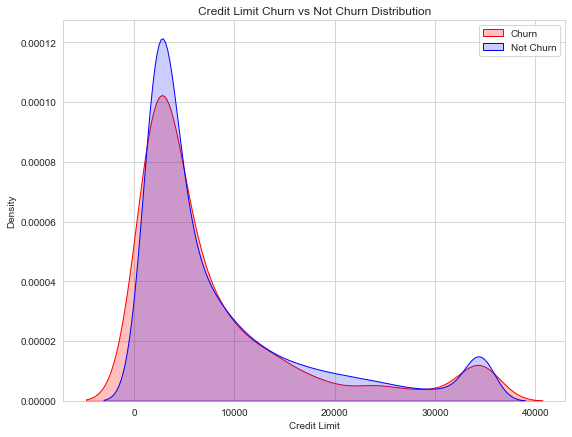

In [31]:
fig, ax = plt.subplots(figsize=(9,7))
dist_plot_kde(df = df,ax = ax,label = 'Churn', feature = "Credit_Limit" ,xlabel= 'Credit Limit',  title= 'Credit Limit Churn vs Not Churn Distribution')

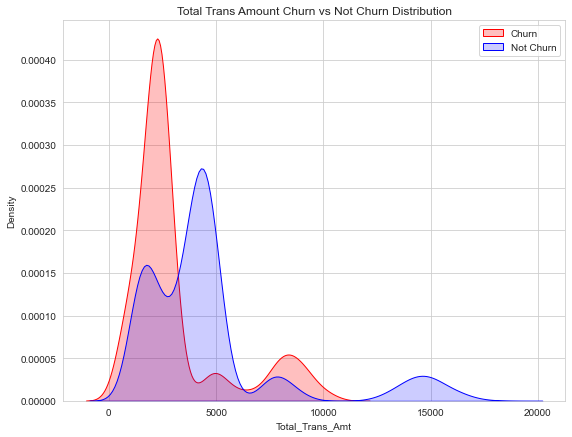

In [32]:
fig, ax = plt.subplots(figsize=(9,7))
dist_plot_kde(df = df,ax = ax,label = 'Churn', feature = "Total_Trans_Amt" ,xlabel= 'Total_Trans_Amt',  title= 'Total Trans Amount Churn vs Not Churn Distribution')

## Modeling Part

In [33]:
#Now one hot encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 39)


In [34]:
df = df_new.copy()

In [35]:
df = df.drop(['Attrition_Flag'],axis=1)

In [36]:
df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn', 'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
  

In [37]:
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


## Features Selection Via ANOVA

In [38]:
df_model = df
X = df_model.drop(['Churn'],axis = 1,errors='ignore')
y = df_model[['Churn']]
random.seed(10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape
anova_results = pd.DataFrame(columns = ['Feature', 'F_Score', 'P_Value'])
bestFeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestFeatures.fit(X_train,y_train)
anova_results['Feature'] = X_train.columns
anova_results['F_Score'] = fit.scores_
anova_results['P_Value'] = fit.pvalues_
anova_results = anova_results.sort_values('P_Value')
anova_results = anova_results[(anova_results['P_Value'] <= 0.06)]

In [39]:
mod_df_feat = anova_results['Feature']
mod_df_feat =mod_df_feat.tolist()

In [40]:
anova_results

,Feature,F_Score,P_Value
11,Total_Trans_Ct,1286.789133,1.818156e-260
12,Total_Ct_Chng_Q4_Q1,676.006649,7.632968e-143
7,Total_Revolving_Bal,583.439750,2.975735e-124
5,Contacts_Count_12_mon,347.183780,8.373081e-76
13,Avg_Utilization_Ratio,255.936946,1.105339e-56
10,Total_Trans_Amt,248.374831,4.355734e-55
4,Months_Inactive_12_mon,189.036779,1.661745e-42
3,Total_Relationship_Count,169.780730,2.128057e-38
9,Total_Amt_Chng_Q4_Q1,125.163168,7.871828e-29
15,Gender_M,19.335225,1.111591e-05


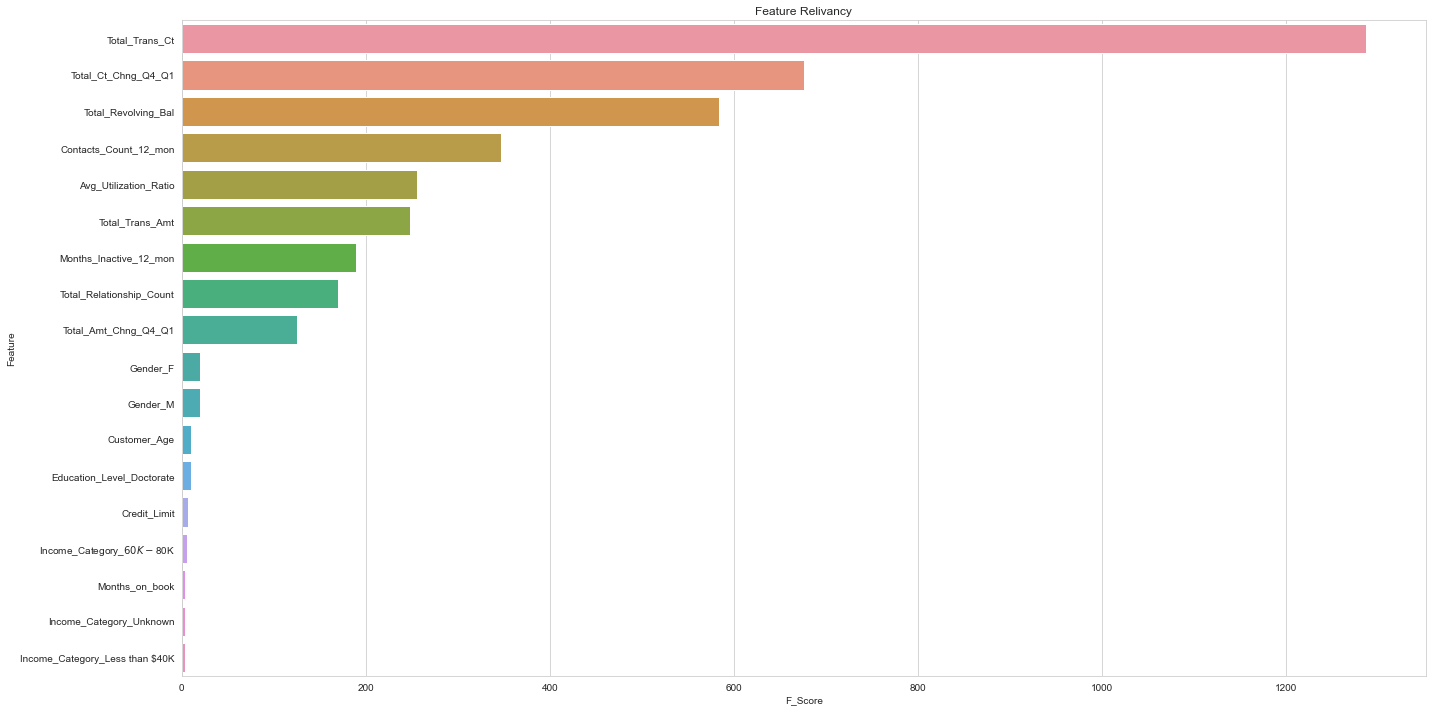

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(x="F_Score", y="Feature", data=anova_results.sort_values(by="F_Score", ascending=False))
plt.title('Feature Relivancy')
plt.tight_layout()
plt.show()

In [42]:
mod_df_feat

['Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Revolving_Bal',
 'Contacts_Count_12_mon',
 'Avg_Utilization_Ratio',
 'Total_Trans_Amt',
 'Months_Inactive_12_mon',
 'Total_Relationship_Count',
 'Total_Amt_Chng_Q4_Q1',
 'Gender_M',
 'Gender_F',
 'Customer_Age',
 'Education_Level_Doctorate',
 'Credit_Limit',
 'Income_Category_$60K - $80K',
 'Months_on_book',
 'Income_Category_Unknown',
 'Income_Category_Less than $40K']

In [43]:
mod_df_feat.extend(['Churn'])

In [44]:
df3 = df[mod_df_feat]

## Train Test Split 

In [45]:
X = df3.drop(['Chrun'],axis = 1,errors='ignore')
y = df3[['Churn']]
random.seed(10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

## Naive Bayes Classifier 

In [46]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
pred =  gnb.predict(X_train)
print((round(accuracy_score(y_train, pred),2)),": is the training accuracy score")
print((round(precision_score(y_train, pred),2)), ": is the training precision score")
print((round(recall_score(y_train, pred),2)), ": is the training recall score")
pred = gnb.predict(X_test)
print((round(accuracy_score(y_test, pred),2)), ": is the accuracy score")
print((round(precision_score(y_test, pred),2)), ": is the precision score")
print((round(recall_score(y_test, pred),2)), ": is the recall score")

1.0 : is the training accuracy score
1.0 : is the training precision score
0.97 : is the training recall score
0.99 : is the accuracy score
1.0 : is the precision score
0.96 : is the recall score


Text(52.0, 0.5, 'Actual classes')

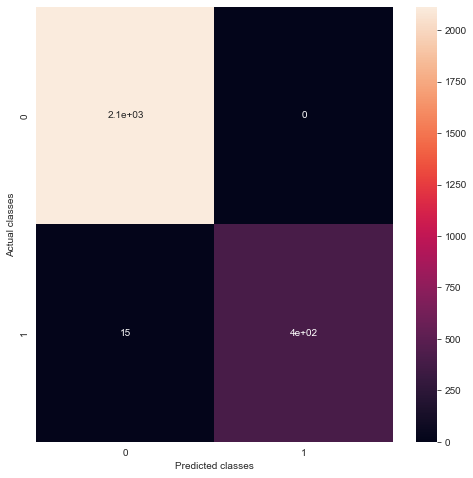

In [49]:
cfm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8,8))
sns.heatmap(cfm, annot=True)

plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

## Logistic Regression ( Classification )

In [45]:
random.seed(10)
LR = LogisticRegression()
## Setting up hyperparameters
weights = np.linspace(0.0,0.99,20)
LRparam_grid = {
  'C': [0.001, 0.01, 0.1, 1, 10,100],
  'class_weight': [{0:x, 1:1.0-x} for x in weights],
  'penalty': ['l1','l2'],
  #     'max_iter': list(range(100,800,100)),
  'solver': [ 'liblinear']
}
try:
    LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 0)
  # fitting the model for grid search 
    LR_search.fit(X_train , np.ravel(y_train,order='C'))
except:
    pass

LR = LogisticRegression(C = LR_search.best_params_['C'],
                        class_weight = LR_search.best_params_['class_weight'],
                        penalty = LR_search.best_params_['penalty'],
                        solver = LR_search.best_params_['solver'])
LR.fit(X_train , np.ravel(y_train,order='C'))


LogisticRegression(C=0.1,
          class_weight={0: 0.05210526315789474, 1: 0.9478947368421052},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)

In [47]:
fpr, tpr, thresholds = roc_curve(y_train,LR.predict_proba(X_train)[:,1],drop_intermediate=False)
threshold = thresholds[np.argmin(np.abs(fpr+tpr-1))]
print(round(threshold,2),": is the threshold")

##Predicting Train and Test after finding optimal threshold
pred =  LR.predict_proba(X_train)[:,1]
pred = (pred >=threshold).astype(int)
print((round(accuracy_score(y_train, pred),2)),": is the training accuracy score")
print((round(precision_score(y_train, pred),2)), ": is the training precision score")
print((round(recall_score(y_train, pred),2)), ": is the training recall score")

pred =  LR.predict_proba(X_test)[:,1]
pred = (pred >=threshold).astype(int)
pred = LR.predict(X_test)
print((round(accuracy_score(y_test, pred),2)), ": is the test accuracy score")
print((round(precision_score(y_test, pred),2)), ": is the test precision score")
print((round(recall_score(y_test, pred),2)), ": is the test recall score")

0.94 : is the threshold
1.0 : is the training accuracy score
1.0 : is the training precision score
1.0 : is the training recall score
1.0 : is the test accuracy score
1.0 : is the test precision score
1.0 : is the test recall score


Text(52.0, 0.5, 'Actual classes')

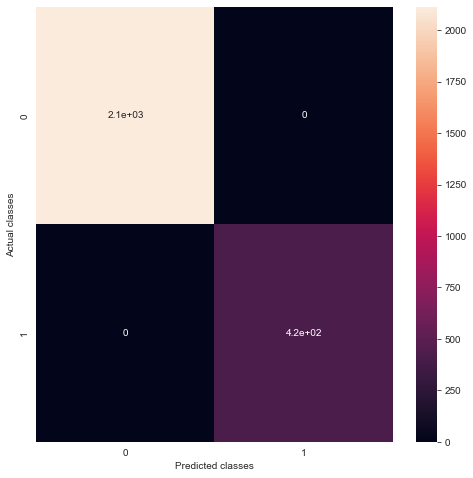

In [49]:
cfm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8,8))
sns.heatmap(cfm, annot=True)

plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

## SVM Classifier 

In [ ]:
random.seed(10)
param_grid = {'C': [0.01, 0.1, 1],'kernel': ['poly','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=3,verbose=0)
grid.fit(X_train,np.ravel(y_train))
svc_mod = SVC(probability=True,class_weight= 'balanced' ,C=grid.best_params_['C'],kernel=grid.best_params_['kernel'])
svc_mod.fit(X_train,np.ravel(y_train))
pred =  svc_mod.predict(X_test)



In [ ]:
print(grid.best_params_['C'])
print(grid.best_params_['kernel'])

In [ ]:
##Predicting for train and test
print(classification_report(y_test,pred))
pred = svc_mod.predict(X_train)
print((round(accuracy_score(y_train, pred),2)),": is the training accuracy score")
print((round(precision_score(y_train, pred),2)), ": is the training precision score")
print((round(recall_score(y_train, pred),2)), ": is the training recall score")
pred =  svc_mod.predict(X_test)
print((round(accuracy_score(y_test, pred),2)), ": is the test accuracy score")
print((round(precision_score(y_test, pred),2)), ": is the test precision score")
print((round(recall_score(y_test, pred),2)), ": is the test recall score")

In [ ]:
cfm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8,8))
sns.heatmap(cfm, annot=True)

plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')